# Chapter 3: Likelihood functions-Sandstone

## Data Management


In this example we will show how we can import data from a csv and generate a model with several depositional series.

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn

In this case instead loading a geo_data object directly, we will create one. The main atributes we need to pass are:
- Extent: X min, X max, Y min, Y max, Z min, Z max
- Resolution: X,Y,Z

Additionaly we can pass the address to csv files (GeoModeller3D format) with the data.

In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([696000,747000,6863000,6950000,-20000, 200],[50, 50, 50],
                         path_f = os.pardir+"/input_data/a_Foliations.csv",
                         path_i = os.pardir+"/input_data/a_Points.csv")

In [90]:

geo_data.interfaces['Z_std'] = 0
geo_data.interfaces['Y_std'] = 0
geo_data.interfaces['X_std'] = 0


geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'EarlyGranite', 'Z_std', 500)
geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'SimpleMafic2', 'Z_std', 750)
geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'SimpleBIF', 'Z_std', 1500)
geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'SimpleMafic1', 'Z_std', 1500)

geo_data.foliations['dip_std'] = 10
geo_data.foliations['azimuth_std'] = 10
gp.get_data(geo_data, verbosity=3)

G_x          G_y       G_z       X X_std            Y  \
interfaces 0           NaN          NaN       NaN  735327     0  6.88135e+06   
           1           NaN          NaN       NaN  699886     0  6.87293e+06   
           2           NaN          NaN       NaN  729355     0  6.88135e+06   
           3           NaN          NaN       NaN  720446     0   6.8837e+06   
           4           NaN          NaN       NaN  703803     0  6.87734e+06   
           5           NaN          NaN       NaN  697047     0  6.86921e+06   
           6           NaN          NaN       NaN  727788     0  6.87851e+06   
           7           NaN          NaN       NaN  729159     0   6.8841e+06   
           8           NaN          NaN       NaN  723285     0  6.88224e+06   
           9           NaN          NaN       NaN  735914     0  6.87656e+06   
           10          NaN          NaN       NaN  729746     0    6.879e+06   
           11          NaN          NaN       NaN  731509     0  6.88194e+06   
           12          NaN          NaN       NaN  733858     0  6.88272e+06   
           13          NaN          NaN       NaN  726320     0  6.88439e+06   
           14          NaN          NaN       NaN  734837     0  6.87685e+06   
           15          NaN          NaN       NaN  707914     0  6.88272e+06   
           16          NaN          NaN       NaN  717411     0  6.88351e+06   
           17          NaN          NaN       NaN  714572     0  6.88204e+06   
           18          NaN          NaN       NaN  711243     0  6.87949e+06   
           19          NaN          NaN       NaN  709677     0  6.88155e+06   
           20          NaN          NaN       NaN  710264     0   6.8839e+06   
           21          NaN          NaN       NaN  720935     0  6.88194e+06   
           22          NaN          NaN       NaN  721523     0  6.87959e+06   
           23          NaN          NaN       NaN  741495     0  6.87754e+06   
           24          NaN          NaN       NaN  734739     0  6.87401e+06   
           25          NaN          NaN       NaN  733565     0   6.8746e+06   
           26          NaN          NaN       NaN  745313     0  6.87822e+06   
           27          NaN          NaN       NaN  733522     0  6.89528e+06   
           28          NaN          NaN       NaN  735485     0  6.89194e+06   
           29          NaN          NaN       NaN  719018     0  6.89222e+06   
...                    ...          ...       ...     ...   ...          ...   
foliations 11     0.782312    -0.598193  0.173648  705859   NaN  6.88003e+06   
           12     0.439482    -0.881307  0.173648  709089   NaN  6.88331e+06   
           13     0.170058    -0.970014  0.173648  738704   NaN  6.87705e+06   
           14     0.310842    -0.934464  0.173648  732683   NaN  6.88233e+06   
           15     0.844266    -0.507012  0.173648  730628   NaN  6.88047e+06   
           16      0.23857    -0.955474  0.173648  728767   NaN  6.87876e+06   
           17     -0.86241     0.475494  0.173648  728572   NaN  6.87993e+06   
           18    -0.982254   -0.0708786  0.173648  729257   NaN  6.88272e+06   
           19    -0.101935    -0.979518  0.173648  727739   NaN  6.88424e+06   
           20    -0.955564     0.238211  0.173648  709970   NaN  6.88272e+06   
           21     0.570099    -0.803015  0.173648  724802   NaN  6.88331e+06   
           22    -0.782957    -0.597349  0.173648  710460   NaN  6.88052e+06   
           23    -0.955039    -0.240305  0.173648  721229   NaN  6.88077e+06   
           24    -0.948735    -0.264099  0.173648  720691   NaN  6.88282e+06   
           25    0.0639964    -0.982726  0.173648  718928   NaN  6.88361e+06   
           26    -0.604023    -0.719846   0.34202  739427   NaN  6.89194e+06   
           27     0.866025  5.30288e-17       0.5  717311   NaN  6.89194e+06   
           28    -0.813798    -0.296198       0.5  742908   NaN  6.89193e+06   
           29    -0.821

In [19]:

geo_data.interfaces.loc[geo_data.interfaces['Z'].isin([-5500])]

,X,Y,Z,formation,series,order_series,isFault,formation number,annotations


'You can visualize the points in 3D (work in progress)

In [3]:
gp.plot_data_3D(geo_data)

Or a projection in 2D:

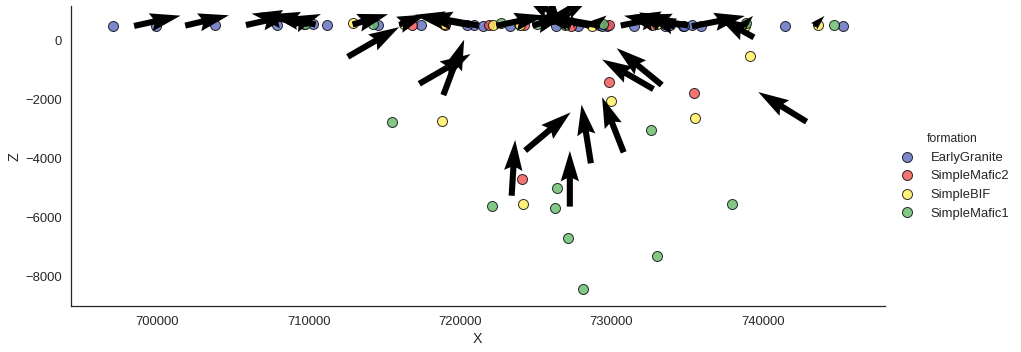

In [47]:
gp.plot_data(geo_data, direction='y')

This model consist in 3 different depositional series. This mean that only data in the same depositional series affect the interpolation. To select with formations belong to witch series we will use the ```set_data_series``` function which takes a python dictionary as input.

We can see the unique formations with:

In [5]:
gp.get_series(geo_data)

,Default serie
0,SimpleMafic2
1,SimpleBIF
2,SimpleMafic1
3,EarlyGranite


Setting the series we also give the specific order of the series. In python 3.6 and above the dictionaries conserve the key order so it is not necessary to give explicitly the order of the series. 

Notice as well that the order of the formations within each series is not relevant for the result but in case of being wrong can lead to confusing color coding (work in progress). 

In the representation given by `get_series` the elements get repeated but is only how Pandas print tables.

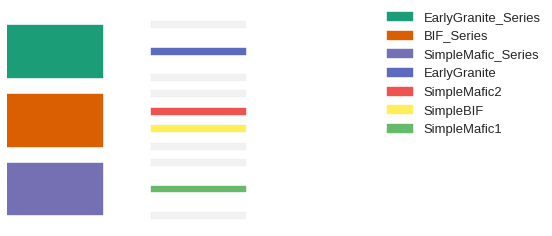

In [91]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"EarlyGranite_Series": 'EarlyGranite', 
                              "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                              "SimpleMafic_Series":'SimpleMafic1'}, 
                      order_series = ["EarlyGranite_Series",
                                      "BIF_Series",
                                      "SimpleMafic_Series"],
                      order_formations= ['EarlyGranite', 'SimpleMafic2', 'SimpleBIF', 'SimpleMafic1'],
              verbose=1)

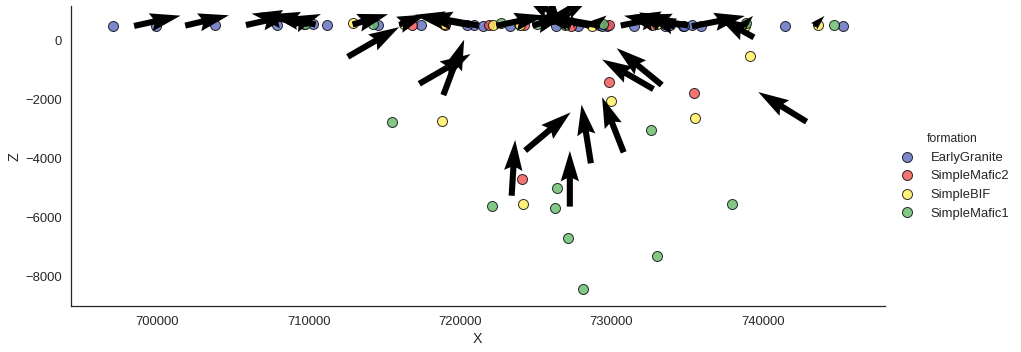

In [6]:
gp.plot_data(geo_data)

## Computing the model

Now as in the previous chapter we just need to create the interpolator object and compute the model.

In [92]:
interp_data = gp.InterpolatorInput(geo_data)

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32


In [9]:
lith_block, fault_block = gp.compute_model(interp_data)

Now if we analyse the results we have a 3D array where the axis 0 represent the superposition of the series (potential fields). The color coding is working process yet.

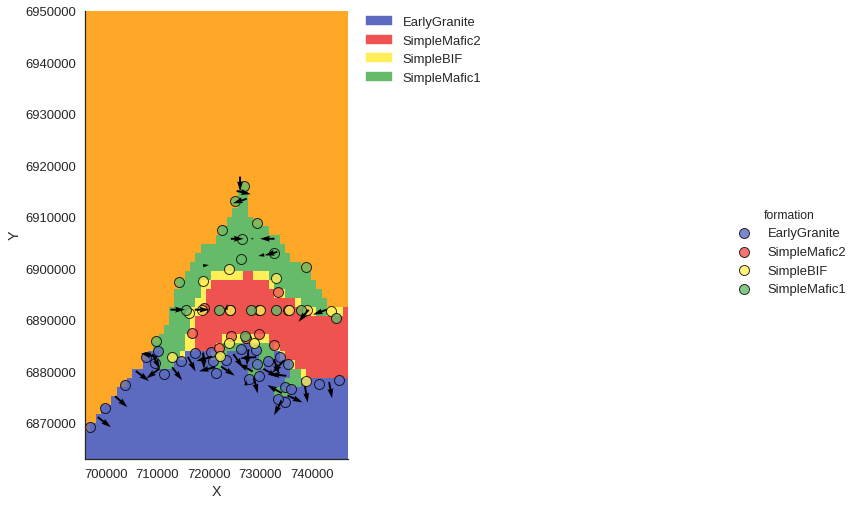

In [10]:
import matplotlib.pyplot as plt

gp.plot_section(geo_data, lith_block[0], -1, plot_data=True, direction='z')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

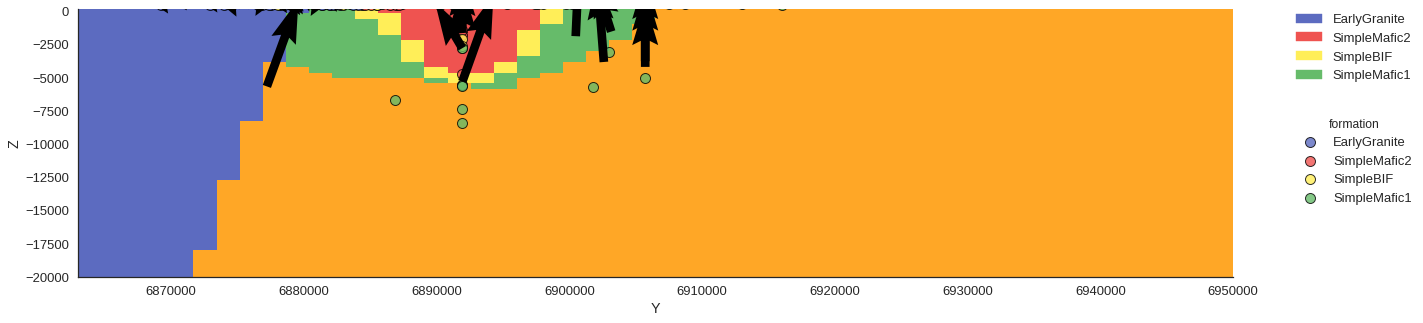

In [12]:
%matplotlib inline
gp.plot_section(geo_data, lith_block[0],25, plot_data=True, direction='x')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

And the axis 2 keeps the faults network that in this model since there is not faults does not represent anything.

Additionally with can export the blocks to vtk in order to visualize them in Paraview. We are working in visualization in place as well.

In [14]:
ver, sim = gp.get_surfaces(interp_data, lith_block[1], None, original_scale=False)

In [16]:
gp.plot_surfaces_3D_real_time(interp_data, ver, sim, alpha=1)

In [96]:
import pymc
interface_Z_stoch = []
foliations_dip_stoch = []
foliations_azimuth_stoch = []

# We rescale the standard deviation
# std = 20./interp_data.rescaling_factor

# loop over the unique group id's and create a pymc.Normal distribution for each
for ind, i in interp_data.geo_data_res.interfaces.iterrows():
    stoch = pymc.Normal(i['annotations']+'_stoch', i['Z'], 1./i['Z_std']**2)
    interface_Z_stoch.append(stoch)
    
for ind, i in interp_data.geo_data_res.foliations.iterrows():
    stoch = pymc.Normal(i['annotations']+'_d_stoch', i['dip'], 1./i['dip_std']**2)
    foliations_dip_stoch.append(stoch)
    
for ind, i in interp_data.geo_data_res.foliations.iterrows():
    stoch = pymc.Normal(i['annotations']+'_a_stoch', i['azimuth'], 1./i['azimuth_std']**2)
    foliations_azimuth_stoch.append(stoch)

In [93]:
interp_data.geo_data_res.interfaces

,X,Y,Z,formation,series,order_series,isFault,formation number,annotations,Z_std,Y_std,X_std
0,0.645758,0.375096,0.545853,EarlyGranite,EarlyGranite_Series,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",0.005148,0.0,0.0
1,0.748576,0.342838,0.545446,EarlyGranite,EarlyGranite_Series,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",0.005148,0.0,0.0
2,0.627614,0.30554,0.545444,EarlyGranite,EarlyGranite_Series,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",0.005148,0.0,0.0
3,0.63971,0.299491,0.545377,EarlyGranite,EarlyGranite_Series,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",0.005148,0.0,0.0
4,0.709263,0.33578,0.545522,EarlyGranite,EarlyGranite_Series,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",0.005148,0.0,0.0
5,0.503628,0.356949,0.545636,EarlyGranite,EarlyGranite_Series,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},5}$",0.005148,0.0,0.0
6,0.49758,0.38114,0.545851,EarlyGranite,EarlyGranite_Series,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},6}$",0.005148,0.0,0.0
7,0.387706,0.401305,0.54618,EarlyGranite,EarlyGranite_Series,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},7}$",0.005148,0.0,0.0
8,0.397786,0.35594,0.545988,EarlyGranite,EarlyGranite_Series,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},8}$",0.005148,0.0,0.0
9,0.432059,0.382149,0.545999,EarlyGranite,EarlyGranite_Series,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},9}$",0.005148,0.0,0.0


In [97]:
import copy
# First we extract from our original intep_data object the numerical data that is necessary for the interpolation.
# geo_data_stoch is a pandas Dataframe

# This is the inital model so it has to be outside the stochastic frame
geo_data_stoch_init = copy.deepcopy(interp_data.geo_data_res)

In [98]:
@pymc.deterministic(trace=True)
def input_data(value = 0, 
               interface_Z_modifier = interface_Z_stoch,
               geo_data_stoch_init = geo_data_stoch_init,
               foliations_dip_stoch = foliations_dip_stoch,
               foliations_azimuth_stoch = foliations_azimuth_stoch,
               verbose=1):
    # First we extract from our original intep_data object the numerical data that is necessary for the interpolation.
    # geo_data_stoch is a pandas Dataframe
    geo_data_stoch = gp.get_data(geo_data_stoch_init, numeric=True)

#     geo_data_stoch_i = gp.get_data(geo_data_stoch_init, 'interfaces', numeric=True)
#     geo_data_stoch_f = gp.get_data(geo_data_stoch_init, 'foliations', numeric=True)

   
    geo_data_stoch.xs('interfaces')['Z'] = np.array(interface_Z_modifier)
    geo_data_stoch.xs('foliations')['dip'] = np.array(foliations_dip_stoch)
    geo_data_stoch.xs('foliations')['azimuth'] = np.array(foliations_azimuth_stoch)
        
#     geo_data_stoch_i['Z'] = np.array(interface_Z_modifier)
#     geo_data_stoch_f['dip'] = np.array(foliations_dip_stoch)
#     geo_data_stoch_f['dip'] = np.array(foliations_dip_stoch)
        
    if verbose > 0:
        print(geo_data_stoch)
        
    # then return the input data to be input into the modeling function. Due to the way pymc2 stores the traces
    # We need to save the data as numpy arrays
    return [geo_data_stoch.xs('interfaces')[["X", "Y", "Z"]].values, geo_data_stoch.xs('foliations').values]

                        G_x           G_y       G_z         X         Y  \
interfaces 0            NaN           NaN       NaN  0.645758  0.375096   
           1            NaN           NaN       NaN  0.748576  0.342838   
           2            NaN           NaN       NaN  0.627614  0.305540   
           3            NaN           NaN       NaN  0.639710  0.299491   
           4            NaN           NaN       NaN  0.709263  0.335780   
           5            NaN           NaN       NaN  0.503628  0.356949   
           6            NaN           NaN       NaN  0.497580  0.381140   
           7            NaN           NaN       NaN  0.387706  0.401305   
           8            NaN           NaN       NaN  0.397786  0.355940   
           9            NaN           NaN       NaN  0.432059  0.382149   
           10           NaN           NaN       NaN  0.461292  0.397269   
           11           NaN           NaN       NaN  0.363514  0.389207   
           12           N